In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("analise_2013_a_2015.csv")

In [4]:
df

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
0,Afghanistan,61.600000,2015,Developing,267.333333,64.000000,0.010000,63.666667,692.000000,18.600000,42.000000,63.666667,0.100000,609.566900,8.156667,17.466667,17.500000,10.000000,2.193192e+07
1,Afghanistan,61.600000,2014,Developing,267.333333,64.000000,0.010000,63.666667,692.000000,18.600000,42.000000,63.666667,0.100000,609.566900,8.156667,17.466667,17.500000,10.000000,2.193192e+07
2,Afghanistan,61.600000,2013,Developing,267.333333,64.000000,0.010000,63.666667,692.000000,18.600000,42.000000,63.666667,0.100000,609.566900,8.156667,17.466667,17.500000,10.000000,2.193192e+07
3,Albania,77.500000,2015,Developing,55.333333,0.000000,4.623333,98.666667,0.000000,57.233333,98.666667,98.666667,0.100000,4314.904919,5.846667,1.233333,1.333333,14.200000,2.024597e+05
4,Albania,77.500000,2014,Developing,55.333333,0.000000,4.623333,98.666667,0.000000,57.233333,98.666667,98.666667,0.100000,4314.904919,5.846667,1.233333,1.333333,14.200000,2.024597e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,Zambia,61.966667,2014,Developing,225.000000,28.000000,1.210000,58.000000,17.666667,22.833333,53.666667,58.000000,4.400000,1079.521735,4.990000,6.333333,6.166667,12.500000,1.079961e+06
555,Zambia,61.966667,2013,Developing,225.000000,28.000000,1.210000,58.000000,17.666667,22.833333,53.666667,58.000000,4.400000,1079.521735,4.990000,6.333333,6.166667,12.500000,1.079961e+06
556,Zimbabwe,61.400000,2015,Developing,368.666667,23.333333,6.445000,91.000000,0.000000,22.300000,91.666667,91.000000,6.433333,119.131949,6.660000,5.900000,5.733333,10.333333,1.044819e+07
557,Zimbabwe,61.400000,2014,Developing,368.666667,23.333333,6.445000,91.000000,0.000000,22.300000,91.666667,91.000000,6.433333,119.131949,6.660000,5.900000,5.733333,10.333333,1.044819e+07


In [5]:
df.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death            float64
alcohol              float64
hepatitisB           float64
measles              float64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
dtype: object

In [6]:
def dsa_get_pairs(data, alvo, atributos, n):
    
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [7]:
alvo = ['life_expectancy']
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

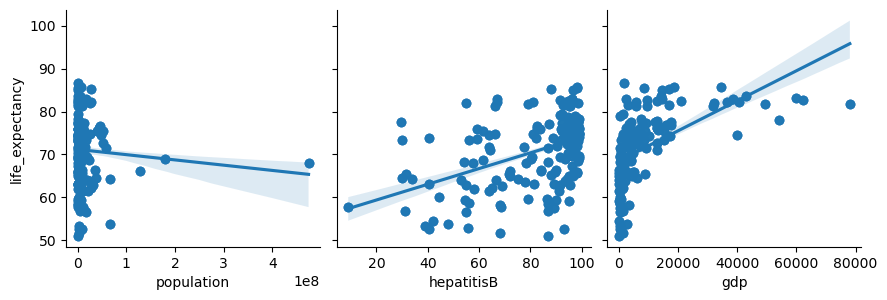

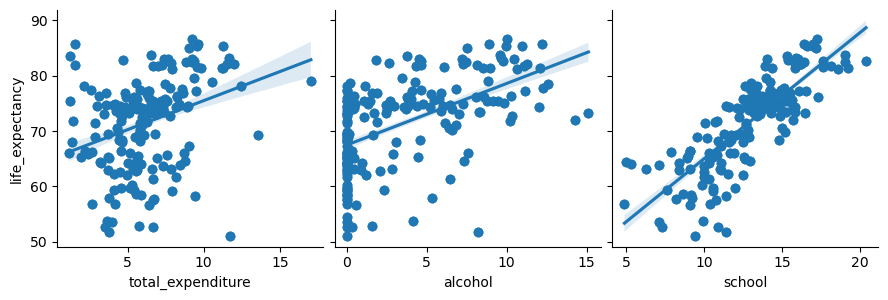

In [8]:
dsa_get_pairs(df, alvo, atributos, 3)

In [9]:
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
valores_ausentes

population           131
gdp                   89
school                33
hepatitisB            27
life_expectancy       10
adult_mortality       10
thinness_till9         8
thinness_till19        8
bmi                    8
total_expenditure      6
alcohol                4
measles                0
polio                  0
diphtheria             0
hiv                    0
inf_death              0
status                 0
year                   0
country                0
dtype: int64

In [10]:
valores_ausentes_porcentagem = valores_ausentes[valores_ausentes > 0] / df.shape[0] 
valores_ausentes_porcentagem

population           0.234347
gdp                  0.159213
school               0.059034
hepatitisB           0.048301
life_expectancy      0.017889
adult_mortality      0.017889
thinness_till9       0.014311
thinness_till19      0.014311
bmi                  0.014311
total_expenditure    0.010733
alcohol              0.007156
dtype: float64

In [11]:
# identificando de outliers atraves do metodo do IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [12]:
# definindo outliers com aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

adult_mortality       6
alcohol               0
bmi                   0
country               0
diphtheria           55
gdp                  39
hepatitisB           23
hiv                  93
inf_death            69
life_expectancy       0
measles              78
polio                49
population           42
school                2
status                0
thinness_till19      24
thinness_till9       21
total_expenditure    11
year                  0
dtype: int64

In [13]:
# funcao para o replace das linhas vazias com a mediana
def impute_median(dados):
    return dados.fillna(dados.median())

In [16]:
df.population = df['population'].transform(impute_median) #
df.hepatitisB = df['hepatitisB'].transform(impute_median) #
df.alcohol = df['alcohol'].transform(impute_median) #
df.total_expenditure = df['total_expenditure'].transform(impute_median) #
df.gdp = df['gdp'].transform(impute_median) #
df.school = df['school'].transform(impute_median) #
df.polio = df['polio'].transform(impute_median) #
df.thinness_till9 = df['thinness_till9'].transform(impute_median) #
df.thinness_till19 = df['thinness_till19'].transform(impute_median) #
df.diphtheria = df['diphtheria'].transform(impute_median) #
df.bmi = df['bmi'].transform(impute_median) #
df.adult_mortality = df['adult_mortality'].transform(impute_median) #
df.life_expectancy = df['life_expectancy'].transform(impute_median) #


In [17]:
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
valores_ausentes

country              0
polio                0
school               0
thinness_till9       0
thinness_till19      0
total_expenditure    0
gdp                  0
hiv                  0
diphtheria           0
bmi                  0
life_expectancy      0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
status               0
year                 0
population           0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            559 non-null    object 
 1   life_expectancy    559 non-null    float64
 2   year               559 non-null    int64  
 3   status             559 non-null    object 
 4   adult_mortality    559 non-null    float64
 5   inf_death          559 non-null    float64
 6   alcohol            559 non-null    float64
 7   hepatitisB         559 non-null    float64
 8   measles            559 non-null    float64
 9   bmi                559 non-null    float64
 10  polio              559 non-null    float64
 11  diphtheria         559 non-null    float64
 12  hiv                559 non-null    float64
 13  gdp                559 non-null    float64
 14  total_expenditure  559 non-null    float64
 15  thinness_till19    559 non-null    float64
 16  thinness_till9     559 non

In [19]:
# correlacao das variaveis numericas no conjunto de dados
df.corr()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
life_expectancy,1.000000,-0.005229,-0.839510,-0.239102,0.531779,0.434177,-0.144334,0.564580,0.545043,0.523884,-0.620476,0.497941,0.315137,-0.466694,-0.479014,0.740152,-0.071136
year,-0.005229,1.000000,0.003991,0.006115,0.014074,0.007784,0.005202,-0.026148,0.001234,0.002237,0.009106,0.008941,-0.015366,0.016651,0.017049,0.018447,0.005213
adult_mortality,-0.839510,0.003991,1.000000,0.204484,-0.349786,-0.378601,0.135535,-0.462469,-0.482757,-0.430218,0.722063,-0.394829,-0.193361,0.325363,0.342645,-0.575686,0.063380
inf_death,-0.239102,0.006115,0.204484,1.000000,-0.101391,-0.208918,0.819495,-0.259810,-0.152840,-0.152523,0.092257,-0.126597,-0.148831,0.488058,0.488474,-0.191761,0.859106
alcohol,0.531779,0.014074,-0.349786,-0.101391,1.000000,0.154338,-0.045567,0.404404,0.270467,0.203158,-0.209664,0.384172,0.318441,-0.436799,-0.434470,0.566387,-0.032090
hepatitisB,0.434177,0.007784,-0.378601,-0.208918,0.154338,1.000000,-0.162025,0.138736,0.751278,0.876591,-0.342199,0.167182,0.076909,-0.113406,-0.140230,0.391825,-0.130269
measles,-0.144334,0.005202,0.135535,0.819495,-0.045567,-0.162025,1.000000,-0.227793,-0.087289,-0.120526,0.012562,-0.091979,-0.125733,0.311466,0.353993,-0.074527,0.647381
bmi,0.564580,-0.026148,-0.462469,-0.259810,0.404404,0.138736,-0.227793,1.000000,0.215969,0.225423,-0.346275,0.300349,0.290846,-0.570517,-0.596111,0.470866,-0.132621
polio,0.545043,0.001234,-0.482757,-0.152840,0.270467,0.751278,-0.087289,0.215969,1.000000,0.799857,-0.418575,0.257076,0.168436,-0.152993,-0.161384,0.467998,-0.107244
diphtheria,0.523884,0.002237,-0.430218,-0.152523,0.203158,0.876591,-0.120526,0.225423,0.799857,1.000000,-0.363362,0.237979,0.173394,-0.143388,-0.168739,0.436011,-0.039244


In [20]:
# funcao para filtrar e visualizar correlacao
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = df.corr()
    
    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

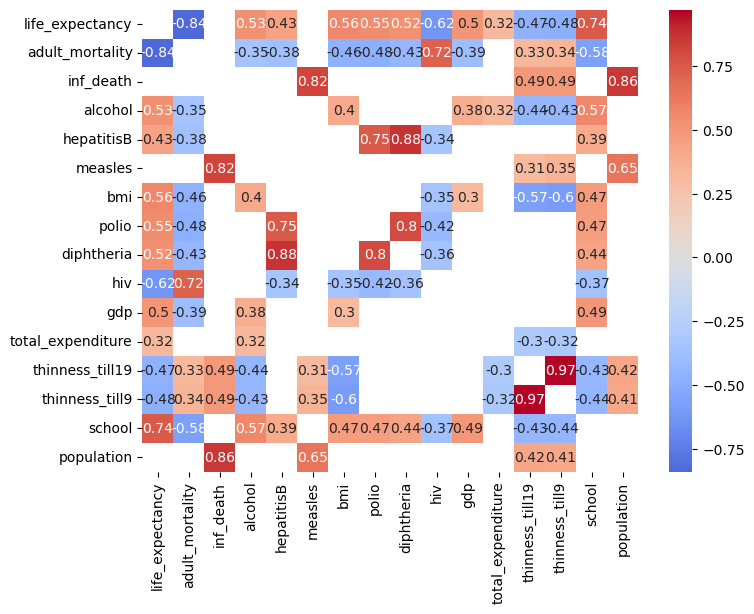

In [21]:
# execucao da funcao
# para este caso, foi escolhido um threshold = 0.3 (filtro de correlacao)
# com as variaveis que apresentam correlacao maior que 0.3, seja ela positiva ou negativa.
filtrar_e_visualizar_correlacao(df, threshold = 0.3, drop_column = None)

In [22]:
# agora para realizar a regressao multipla vamos utilizar as variaveis
# adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle 
# pois estas sao as que possuem uma correlacao maior com a variavel alvo
# mas antes, vamos verificar se existe muticolineariedade
# ou seja, se mais de uma variavel "representa a mesma coisa"
# para isso vamos considerar 0.5 como marca de corte. Vamos filtrar mais uma vez a matriz de correlação.

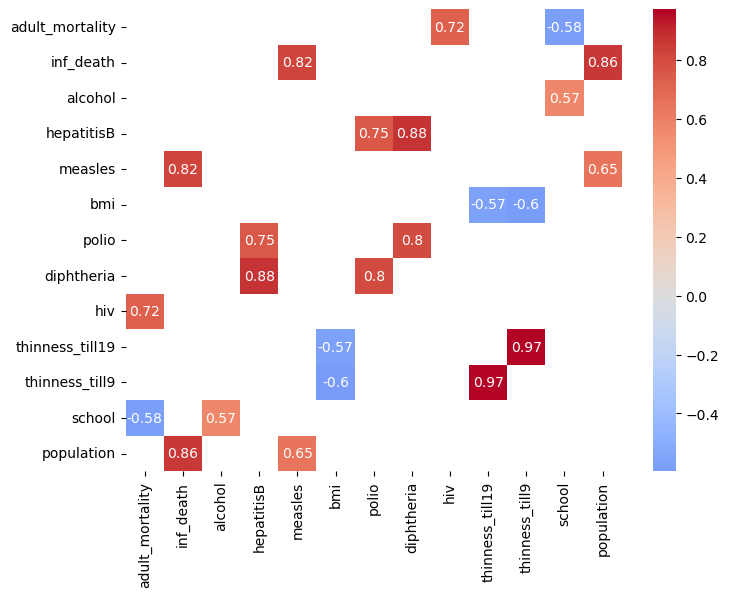

In [23]:
filtrar_e_visualizar_correlacao(df, threshold = 0.5, drop_column = 'life_expectancy')

In [24]:
# preparando o dataset final para a regressao multipla
df_final = pd.DataFrame({'life_expectancy': df['life_expectancy'],
                         'bmi': df['bmi'],
                         'adult_mortality': df['adult_mortality'],
                         'diphtheria': df['diphtheria'],
                         'hiv': df['hiv'],
                         'gdp': df['gdp'],
                         'thinness_till19': df['thinness_till19'],
                         'school': df['school'],
                        })

In [25]:
df_final

,life_expectancy,bmi,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school
0,61.600000,18.600000,267.333333,63.666667,0.100000,609.566900,17.466667,10.000000
1,61.600000,18.600000,267.333333,63.666667,0.100000,609.566900,17.466667,10.000000
2,61.600000,18.600000,267.333333,63.666667,0.100000,609.566900,17.466667,10.000000
3,77.500000,57.233333,55.333333,98.666667,0.100000,4314.904919,1.233333,14.200000
4,77.500000,57.233333,55.333333,98.666667,0.100000,4314.904919,1.233333,14.200000
...,...,...,...,...,...,...,...,...
554,61.966667,22.833333,225.000000,58.000000,4.400000,1079.521735,6.333333,12.500000
555,61.966667,22.833333,225.000000,58.000000,4.400000,1079.521735,6.333333,12.500000
556,61.400000,22.300000,368.666667,91.000000,6.433333,119.131949,5.900000,10.333333
557,61.400000,22.300000,368.666667,91.000000,6.433333,119.131949,5.900000,10.333333


In [26]:
from sklearn.linear_model import LinearRegression

# Definindo X e y
X = df_final[['bmi', 'adult_mortality', 'diphtheria', 'hiv', 'gdp', 'thinness_till19', 'school']]
y = df_final['life_expectancy']

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Mostrar coeficientes
print("Intercepto (β₀):", modelo.intercept_)
print("Coeficientes (β₁, β₂, ...):", modelo.coef_)
print("R² (score):", modelo.score(X, y))

Intercepto (β₀): 62.78708872793637
Coeficientes (β₁, β₂, ...): [ 4.02359958e-02 -4.32767472e-02  5.56073993e-02 -3.81697900e-01
  5.64848813e-05 -1.87209786e-01  7.36337256e-01]
R² (score): 0.8401973177379547


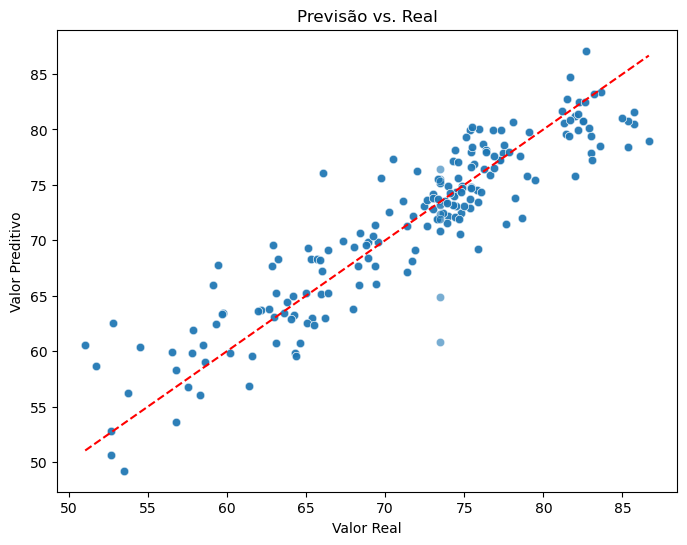

In [27]:
# grafico
y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # Linha de referência (y=x)
plt.xlabel('Valor Real')
plt.ylabel('Valor Preditivo')
plt.title('Previsão vs. Real')
plt.show()